# Work with all cells

In [1]:
# Imports:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import math
import psycopg2
import numpy as np
import pandas as pd
from datetime import date
from tqdm import tqdm_notebook

# Plotting:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set()

# External functions from subfolder /database_helpers. 
# as soon as you change something in there and press save, it will auto reload on next execution.
from database_helpers.psql_start import *
from database_helpers.create_tables import *
from database_helpers.write2tables import *
from postgres_analysis_helpers.general import *
from postgres_analysis_helpers.get_data import *
from postgres_analysis_helpers.circstat_functions import *
# register pickle type to retrieve binary data from database
psycopg2.extensions.register_type(psycopg2.extensions.new_type(psycopg2.BINARY.values, 'BINARY-PICKLE', cast_pickle))

Loaded analysis helpers: General
Loaded postgres_analysis_helpers -> general
Loaded postgres_analysis_helpers -> get_data
Loaded postgres_analysis_helpers -> circstat_functions


In [2]:
# Database connection check
db_status = test_connect()
if db_status == False:
    print('Grrr... no database connection could be established.')
else:
    print('Woot! Database connection is established!')

Connecting to the PostgreSQL database...
Woot! Database connection is established!


### Load dataframes 

In [3]:
# 'dataframe_export/excited_cells.pkl'
# 'dataframe_export/inhibited_cells.pkl'
# 'dataframe_export/all_merged_df.pkl'

In [4]:
all_cells = pd.read_pickle('dataframe_export/all_merged_df.pkl')

In [5]:
stimulus_stats = pd.DataFrame() # create empty dataframe or feed in a base dataframe from before! 
psql = psql_neuroballs(all_cells) # initialize retrieval

Length of input dataframe: 1918


In [6]:
filter_sessions = "NOT LIKE '%las%' AND session_name NOT LIKE '%obj%' AND session_name NOT LIKE '%stab%' AND session_name NOT LIKE '%room%'"

In [7]:
dict_ = {'BNT_tb_screen': ''}
all_cells_data = psql.retrieve_data(user_sql_tables=dict_,user_sql_filter=filter_sessions)

Dataframe not empty


HBox(children=(IntProgress(value=0, description='Mining tables: ', max=1), HTML(value='')))

Table dictionary is empty for this entry. Taking all columns!
Included the following columns: ('analysis_ts', 'path_name', 'informationcontent_bnt', 'tc_stats_hd_peakrate_bnt', 'gridstats_orientation_bnt', 'numfields_bnt', 'tc_stats_mean_direction_bnt', 'meanrate_outside_fields_bnt', 'gridstats_ellipse_bnt', 'peak_rate_bnt', 'gridstats_spacing_bnt', 'borderscore_bnt', 'informationrate_bnt', 'speedscore_bnt', 'tc_stats_peakdirection_bnt', 'tc_stats_mvl_bnt', 'coherence_bnt', 'grid_score_bnt', 'fieldmain_bnt', 'sparsity_bnt', 'gridstats_ellipse_theta_bnt', 'calbindin_bnt', 'theta_strength_bnt', 'selectivity_bnt', 'mean_rate_bnt', 'theta_mean_phase_bnt', 'stability_half_bnt', 'angular_stability_bnt', 'masked_ratemap_bnt', 'autocorr_bnt', 'occupancy_map_bnt', 'hist_angle_smooth_bnt', 'bins_angle_center_bnt', 'spiketimes_cluster_bnt', 'params_bnt', 'calbindin_dist_bnt')


HBox(children=(IntProgress(value=0, description='BNT_tb_screen: ', max=1918), HTML(value='')))

Success. NaNs: 316



In [8]:
all_cells_data.dropna(subset=['session_name'],inplace=True)

In [ ]:
drop_subgroup = ['animal_id','n_drive_user','session_ts','cluster_no','tetrode_no']
other_cells = other_cells.drop_duplicates(drop_subgroup).sort_values(by=drop_subgroup).reset_index().copy()

In [9]:
all_cells_data.head()

,animal_id,cluster_no,n_drive_user,session_ts,tetrode_no,label,analysis_ts,path_name,informationcontent_bnt,tc_stats_hd_peakrate_bnt,...,angular_stability_bnt,masked_ratemap_bnt,autocorr_bnt,occupancy_map_bnt,hist_angle_smooth_bnt,bins_angle_center_bnt,spiketimes_cluster_bnt,params_bnt,calbindin_dist_bnt,session_name
0,74472,23,davidcr,2017-09-10 12:41:58,6,excited,2017-09-11 10:00:19.632651,/mnt/N/davidcr/74472/10092017,0.254342,1.14854,...,0.0428486,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[0.192481323849, 0.221775711657, 0.3106056922,...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[4.6504375, 5.26564583333, 5.80858333333, 6.37...",...,0.477067,10092017s1
2,74472,33,davidcr,2017-09-17 13:27:31,6,excited,2017-09-18 20:00:14.812806,/mnt/N/davidcr/74472/17092017,0.221291,17.695,...,0.912238,"[[5.49664121671, 6.24870015774, 7.4454979933, ...","[[-0.312419749596, -0.255216323537, -0.2808412...","[[0.682310979443, 0.681266651374, 0.6836504690...","[8.50499268231, 7.8507490569, 7.55207788, 7.61...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[0.1108125, 0.191479166667, 0.215666666667, 0....",...,1.02332,17092017s1
3,74472,33,davidcr,2017-09-17 13:27:31,6,excited,2017-09-18 20:00:14.812806,/mnt/N/davidcr/74472/17092017,0.221291,17.695,...,0.912238,"[[5.49664121671, 6.24870015774, 7.4454979933, ...","[[-0.312419749596, -0.255216323537, -0.2808412...","[[0.682310979443, 0.681266651374, 0.6836504690...","[8.50499268231, 7.8507490569, 7.55207788, 7.61...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[0.1108125, 0.191479166667, 0.215666666667, 0....",...,1.02332,17092017s1
4,74472,33,davidcr,2017-09-17 13:27:31,6,excited,2017-09-18 20:00:14.812806,/mnt/N/davidcr/74472/17092017,0.221291,17.695,...,0.912238,"[[5.49664121671, 6.24870015774, 7.4454979933, ...","[[-0.312419749596, -0.255216323537, -0.2808412...","[[0.682310979443, 0.681266651374, 0.6836504690...","[8.50499268231, 7.8507490569, 7.55207788, 7.61...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[0.1108125, 0.191479166667, 0.215666666667, 0....",...,1.02332,17092017s1
5,74472,40,davidcr,2017-09-16 11:24:48,6,excited,2017-09-16 18:00:13.918666,/mnt/N/davidcr/74472/16092017,0.212937,10.6942,...,0.855617,"[[3.12775857908, 3.22514043177, 3.47403098373,...","[[0.145766975633, 0.354382731016, 0.4208348341...","[[1.61732065302, 1.48942294015, 1.32082992465,...","[5.06340794559, 4.49339490245, 4.14707257331, ...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[1.29572916667, 1.422, 1.4995625, 1.5397083333...",...,1.02339,16092017s1


In [18]:
all_cells_data.iloc[22:25]

,animal_id,cluster_no,n_drive_user,session_ts,tetrode_no,label,analysis_ts,path_name,informationcontent_bnt,tc_stats_hd_peakrate_bnt,...,angular_stability_bnt,masked_ratemap_bnt,autocorr_bnt,occupancy_map_bnt,hist_angle_smooth_bnt,bins_angle_center_bnt,spiketimes_cluster_bnt,params_bnt,calbindin_dist_bnt,session_name
1500,74472,37,davidcr,2017-09-18 16:45:54,6,rest,2017-09-19 12:00:26.566286,/mnt/N/davidcr/74472/18092017,0.420743,7.54204,...,0.914104,"[[2.46869248488, 2.63700514952, 3.10216543735,...","[[-0.549038911851, -0.585566282336, -0.6161920...","[[0.889901640965, 0.944847480142, 1.0217450633...","[3.30995168544, 3.40735400114, 3.30594571298, ...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[1.28522916667, 6.530625, 7.01908333333, 7.136...",...,1.12538,18092017_border_s2
1498,74472,37,davidcr,2017-09-18 16:45:54,6,rest,2017-09-19 12:00:26.566286,/mnt/N/davidcr/74472/18092017,0.420743,7.54204,...,0.914104,"[[2.46869248488, 2.63700514952, 3.10216543735,...","[[-0.549038911851, -0.585566282336, -0.6161920...","[[0.889901640965, 0.944847480142, 1.0217450633...","[3.30995168544, 3.40735400114, 3.30594571298, ...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[1.28522916667, 6.530625, 7.01908333333, 7.136...",...,1.12538,18092017_border_s2
28,74472,37,davidcr,2017-09-18 16:45:54,6,both,2017-09-19 12:00:26.566286,/mnt/N/davidcr/74472/18092017,0.420743,7.54204,...,0.914104,"[[2.46869248488, 2.63700514952, 3.10216543735,...","[[-0.549038911851, -0.585566282336, -0.6161920...","[[0.889901640965, 0.944847480142, 1.0217450633...","[3.30995168544, 3.40735400114, 3.30594571298, ...","[0.0, 0.0523598775598, 0.10471975512, 0.157079...","[1.28522916667, 6.530625, 7.01908333333, 7.136...",...,1.12538,18092017_border_s2


In [10]:
len(all_cells_data[all_cells_data.grid_score_bnt > 0.3])/len(all_cells_data)

0.10158543746330007

In [11]:
all_cells_data.sort_values(by='grid_score_bnt',ascending=False,inplace=True)

HBox(children=(IntProgress(value=0, max=25), HTML(value='')))


Generating plot ...


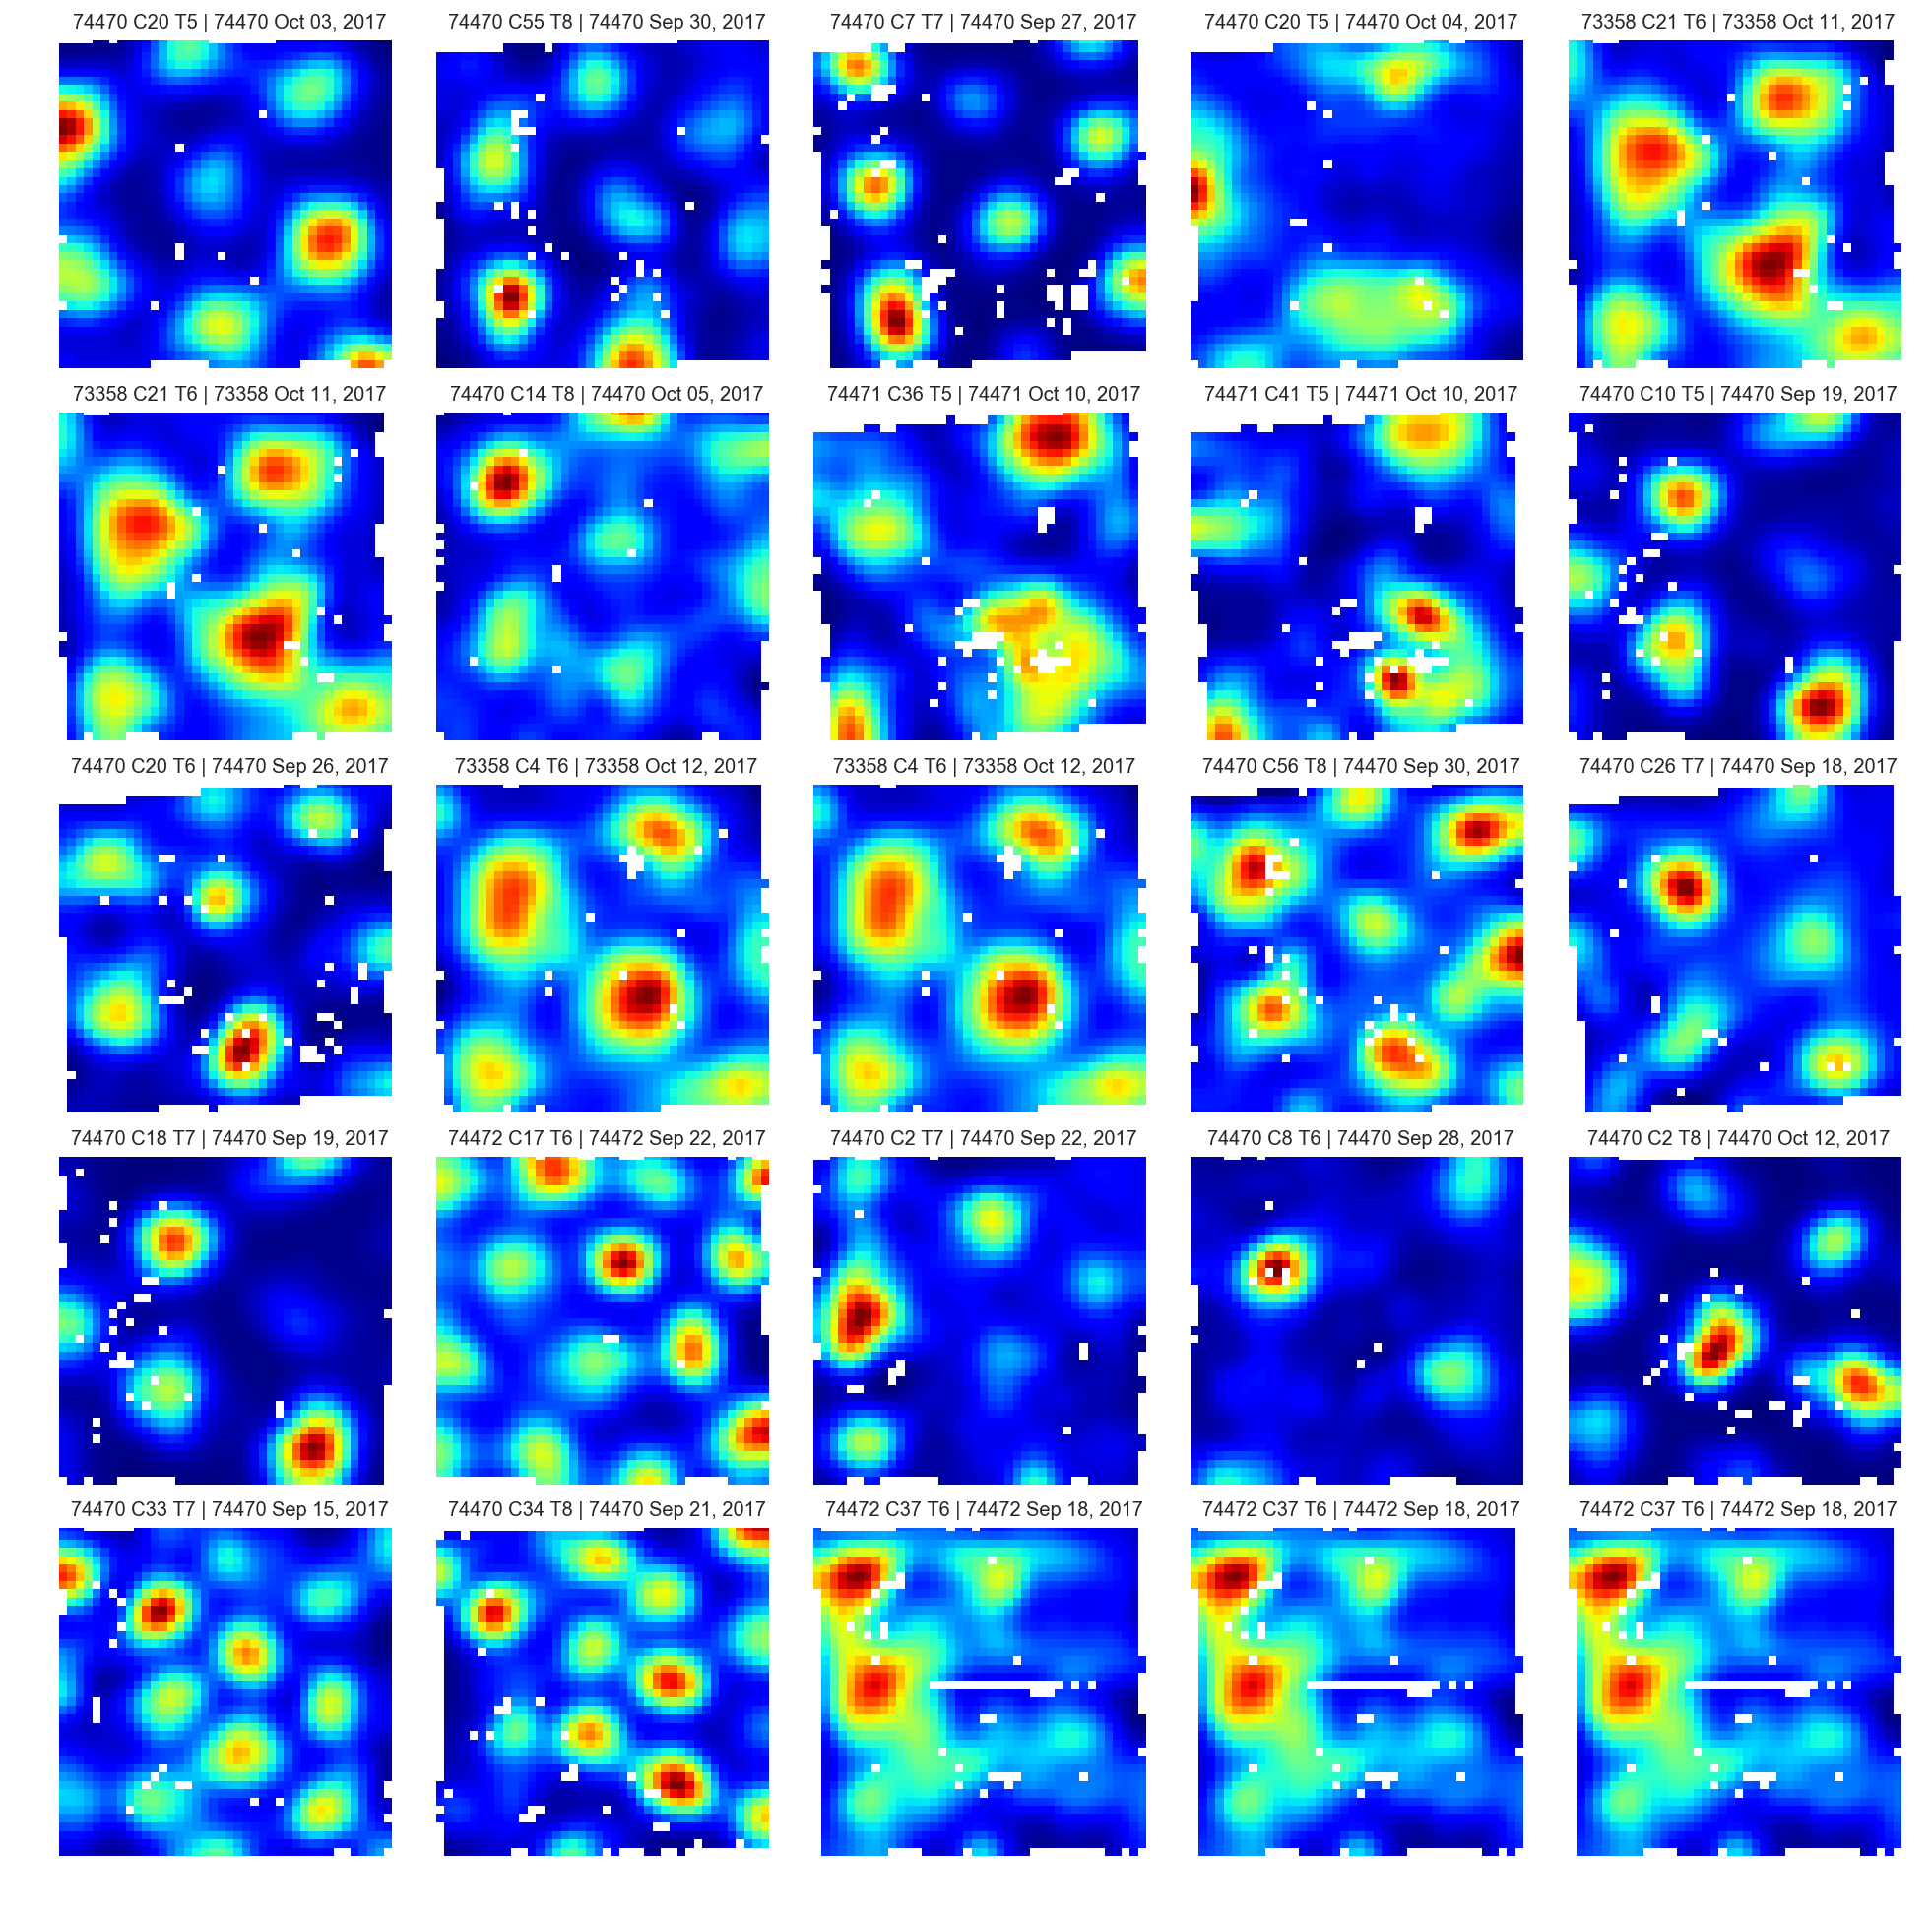

In [12]:
draw_ratemaps(all_cells_data,'masked_ratemap_bnt',25,0)

In [13]:
all_cells_data.iloc[23]

animal_id                                                                  74472
cluster_no                                                                    37
n_drive_user                                                             davidcr
session_ts                                                   2017-09-18 16:45:54
tetrode_no                                                                     6
label                                                                       rest
analysis_ts                                           2017-09-19 12:00:26.566286
path_name                                          /mnt/N/davidcr/74472/18092017
informationcontent_bnt                                                  0.420743
tc_stats_hd_peakrate_bnt                                                 7.54204
gridstats_orientation_bnt                      [[-90.0], [-43.152389734], [0.0]]
numfields_bnt                                                                  2
tc_stats_mean_direction_bnt 

In [14]:
all_cells_data.iloc[24]

animal_id                                                                  74472
cluster_no                                                                    37
n_drive_user                                                             davidcr
session_ts                                                   2017-09-18 16:45:54
tetrode_no                                                                     6
label                                                                       both
analysis_ts                                           2017-09-19 12:00:26.566286
path_name                                          /mnt/N/davidcr/74472/18092017
informationcontent_bnt                                                  0.420743
tc_stats_hd_peakrate_bnt                                                 7.54204
gridstats_orientation_bnt                      [[-90.0], [-43.152389734], [0.0]]
numfields_bnt                                                                  2
tc_stats_mean_direction_bnt 

In [15]:
all_cells_data.iloc[25]

animal_id                                                                  74472
cluster_no                                                                    37
n_drive_user                                                             davidcr
session_ts                                                   2017-09-18 16:45:54
tetrode_no                                                                     6
label                                                                       both
analysis_ts                                           2017-09-19 12:00:26.566286
path_name                                          /mnt/N/davidcr/74472/18092017
informationcontent_bnt                                                  0.420743
tc_stats_hd_peakrate_bnt                                                 7.54204
gridstats_orientation_bnt                      [[-90.0], [-43.152389734], [0.0]]
numfields_bnt                                                                  2
tc_stats_mean_direction_bnt 